In [1]:
import numpy as np
import pandas as pd
from astropy.stats import sigma_clipped_stats 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
reals = pd.read_csv('../results/reals_table.csv')
bogus = pd.read_csv('../results/bogus_table.csv')
matched_lcs = pd.read_csv('../results/matched_lcs_visit_by_visit.csv')

In [4]:
flags = [acol for acol in reals.columns if 'flag' in acol]

In [5]:
bogus[flags].describe()

,flags_negative,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_flag,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,...,ip_diffim_PsfDipoleFlux_pos_flag,ip_diffim_PsfDipoleFlux_neg_flag,ip_diffim_ClassificationDipole_flag,ip_diffim_DipoleFit_flag_classification,ip_diffim_DipoleFit_flag_classificationAttempted,ip_diffim_DipoleFit_flag,ip_diffim_DipoleFit_flag_edge,ip_diffim_forced_PsfFlux_flag,ip_diffim_forced_PsfFlux_flag_noGoodPixels,ip_diffim_forced_PsfFlux_flag_edge
count,634976,634976,634976,634976,634976,634976,634976,634976,634976,634976,...,634976,634976,634976,634976,634976,634976,634976,634976,634976,634976
unique,1,2,1,2,2,1,2,2,1,2,...,1,1,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
freq,634976,627181,634976,634974,627183,634976,345995,627345,634976,622194,...,634976,634976,634975,469159,469043,469043,634280,630703,634974,630703


In [6]:
def binary_plot_hist(reals, bogus, column, axis, logy=False, logx=False, **kwargs): #density=True, histtype='barstacked', alpha=1.):
    #axis.hist(reals[column].astype(float), histtype=histtype, align='left', alpha=alpha,
    #          log=logy, density=density, lw=1.5, color='black', label='Real')
    #axis.hist(bogus[column].astype(float), histtype=histtype, align='right', alpha=alpha,
    #          log=logy, density=density, lw=1.5, color='red', label='Bogus')
    axis.hist(reals[column].astype(float), align='left', color='black', label='Real', **kwargs)
              #histtype=histtype,  alpha=alpha, log=logy, density=density, lw=1.5, )
    axis.hist(bogus[column].astype(float), color='red', label='Bogus', align='right', **kwargs)
              #alpha=alpha, log=logy, density=density, lw=1.5, )

    axis.set_xlabel(column)
    axis.set_ylabel('N')
    if logx: 
        axis.set_xscale('log')
    return axis

In [7]:
cols = flags

In [8]:
len(cols)

103

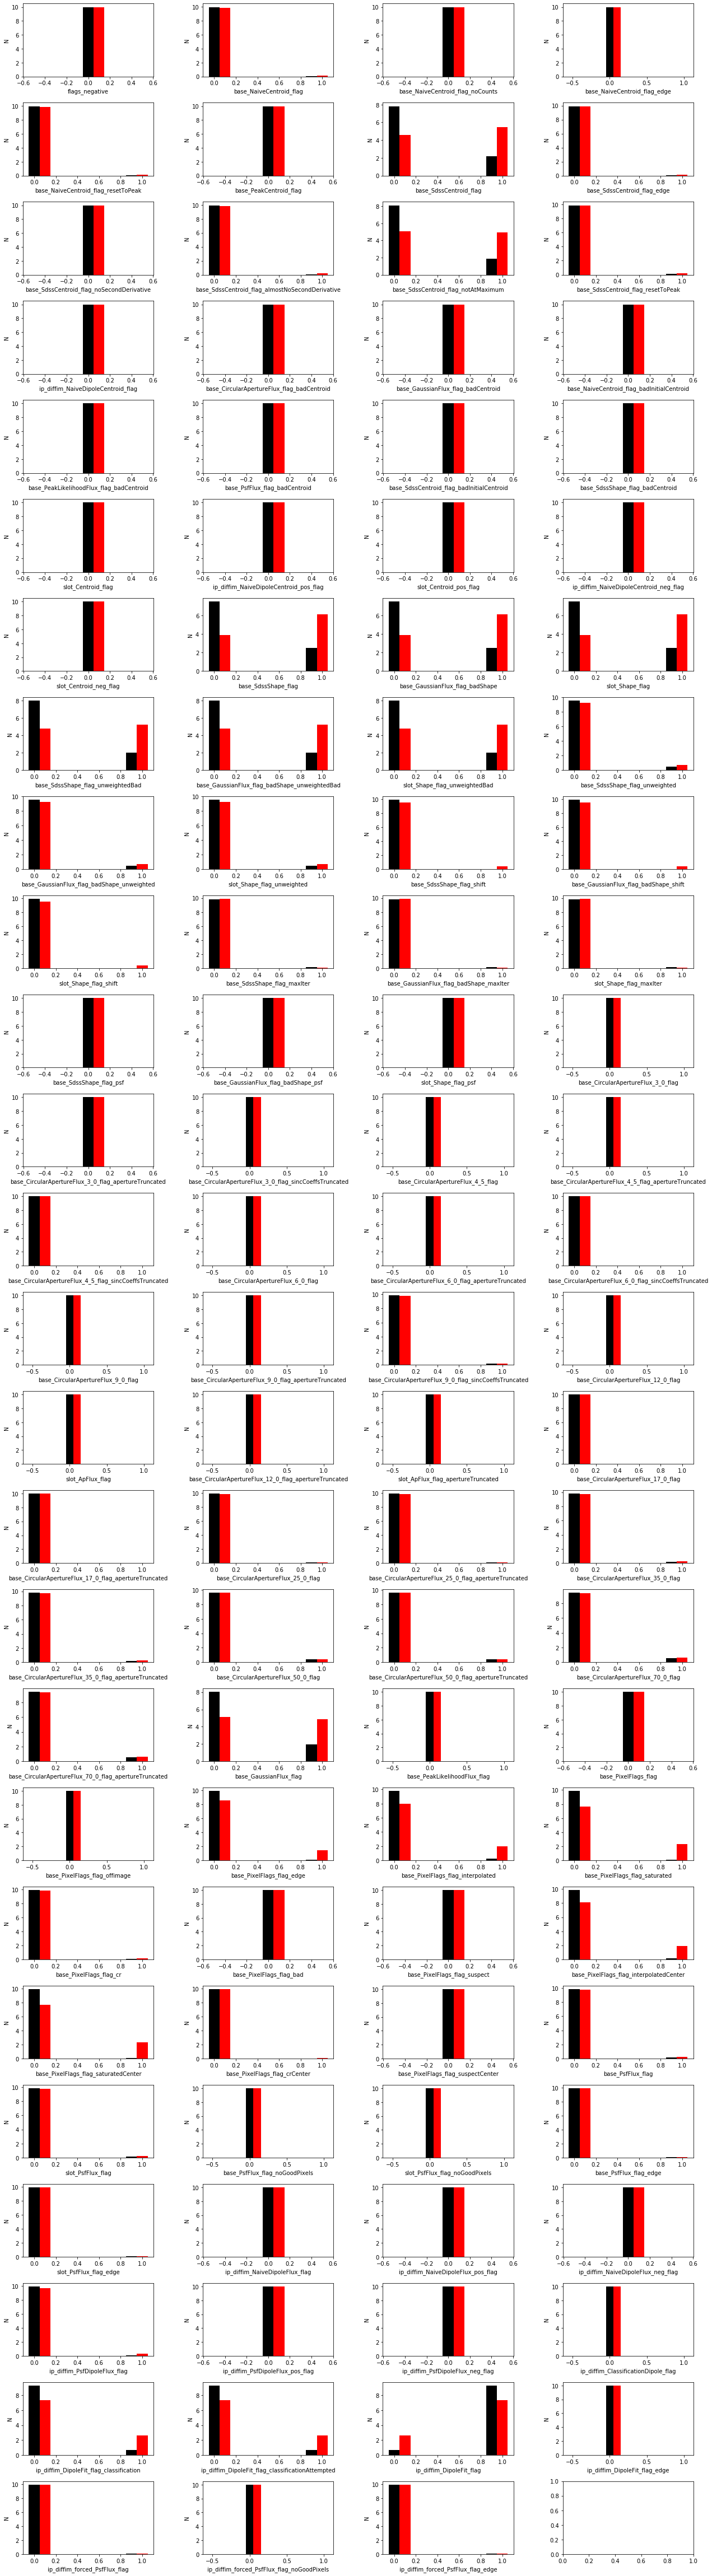

In [9]:
fig, axis = plt.subplots(ncols=4, nrows=26, figsize=(18, 64))
for acol, ax in zip(cols, axis.flatten()):
    binary_plot_hist(reals, bogus, acol, ax, logy=False, logx=False, density=True)
    #ax.legend(loc='best')
plt.tight_layout()

Many of the flags have always the same value. A large group presents no actual correlation with the actual class of the object.

In case of Dipole or Shape related flags we have instead, some (at least _weak_) correlation with the class.

In [10]:
instFluxCols = [acol for acol in reals.columns if 'instFlux' in acol and 'Cov' not in acol and 'Err' not in acol]

In [11]:
cols = instFluxCols[:]
print(len(cols))

25


In [12]:
for acol in instFluxCols:
    try:
        reals[acol+'_SN'] = reals[acol]/reals[acol+'Err']
    except:
        print('failed', acol)
        continue
    

failed ip_diffim_DipoleFit_instFlux


In [13]:
for acol in instFluxCols:
    try:
        bogus[acol+'_SN'] = bogus[acol]/bogus[acol+'Err']
    except:
        print('failed', acol)
        continue
    

failed ip_diffim_DipoleFit_instFlux


For the case of fluxes, we will inspect what is happening. They are trickier since they may contain non valid values

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:421: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):


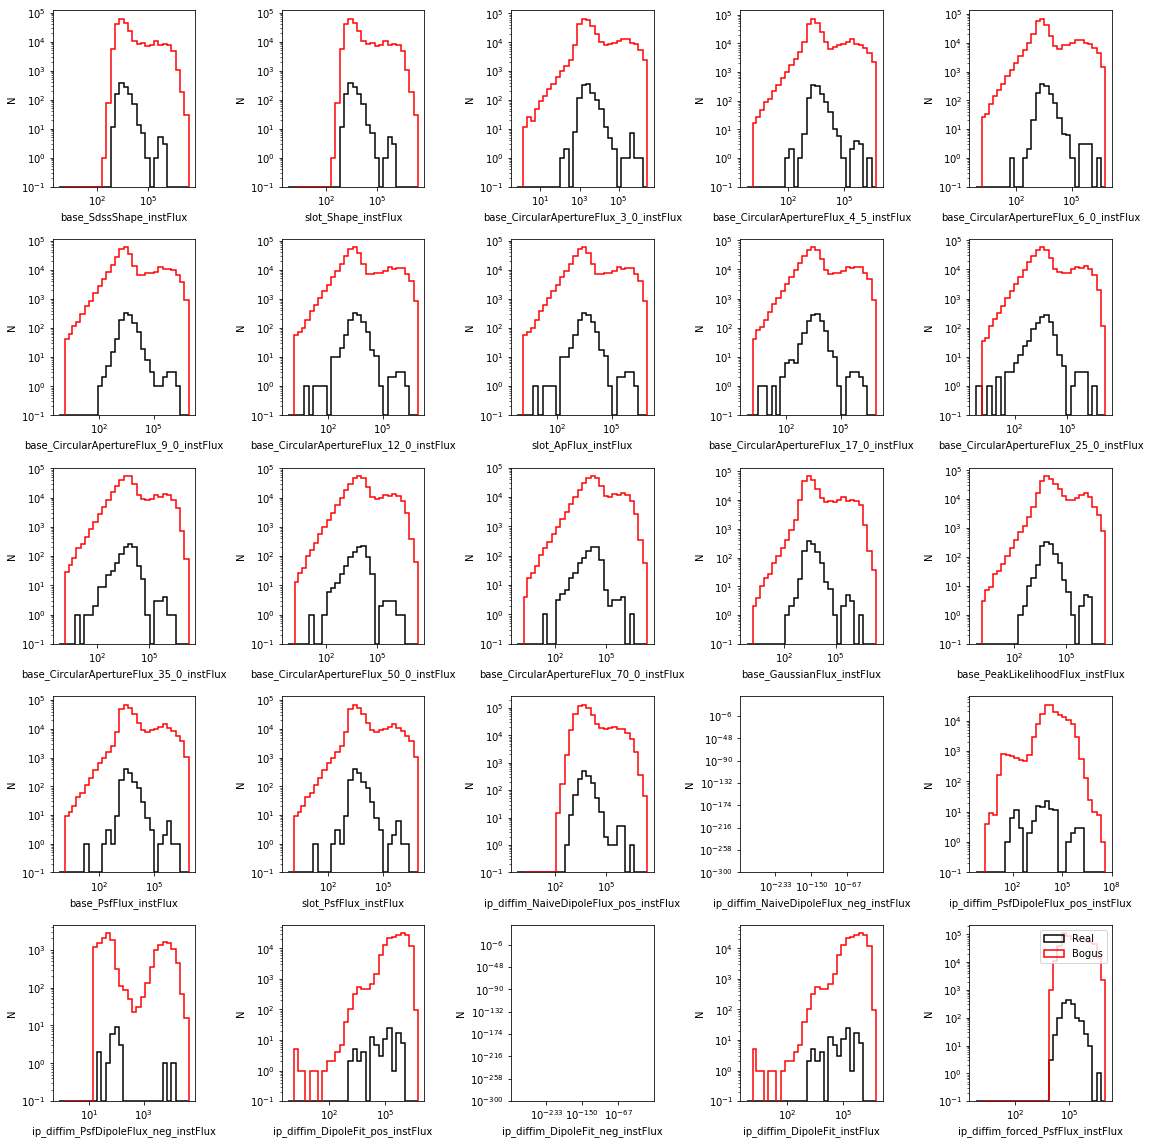

In [14]:
fig, axis = plt.subplots(ncols=5, nrows=5, figsize=(16, 16))
for acol, ax in zip(cols, axis.flatten()):
    bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=30)
    binary_plot_hist(reals, bogus, acol, ax, log=True, bins=bins,
                     logx=True, density=False, histtype='step', lw=1.5)
ax.legend(loc='best')
plt.tight_layout()

In [15]:
cols = [acol for acol in reals.columns if '_SN' in acol]

In [16]:
len(cols)

24

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6735: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6736: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


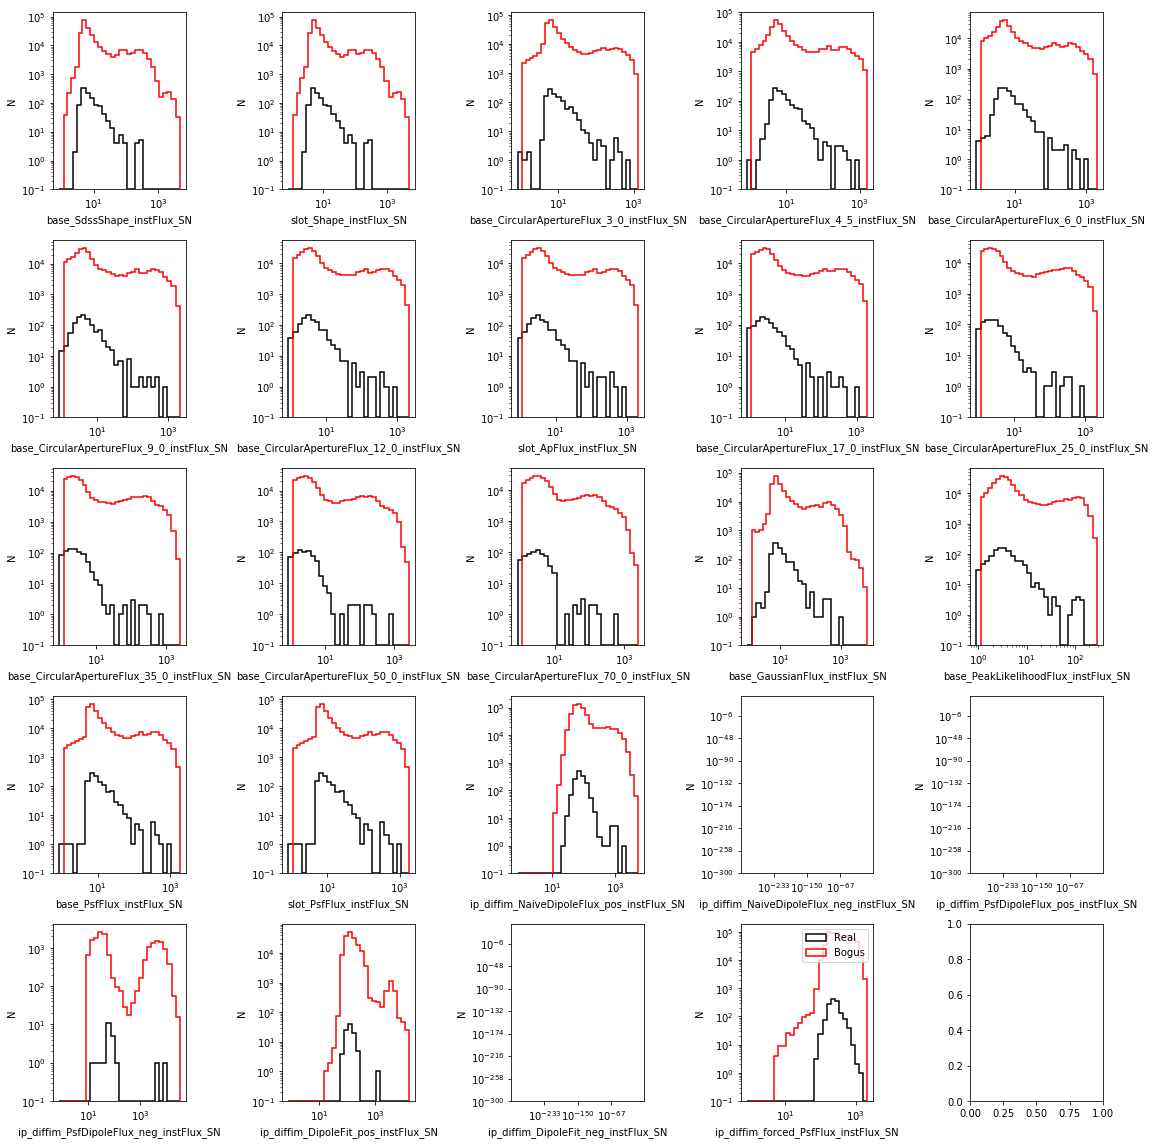

In [17]:
fig, axis = plt.subplots(ncols=5, nrows=5, figsize=(16, 16))
for acol, ax in zip(cols, axis.flatten()):
    bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=30)
    binary_plot_hist(reals, bogus, acol, ax, log=True, bins=bins,
                     logx=True, density=False, histtype='step', lw=1.5)
ax.legend(loc='best')
plt.tight_layout()

In [18]:
cols = [acol for acol in reals.columns if 'Dipole' in acol 
        and 'flag' not in acol 
        and 'Cov' not in acol 
        and 'Err' not in acol
        and 'Classification' not in acol]

In [19]:
len(cols)

38

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


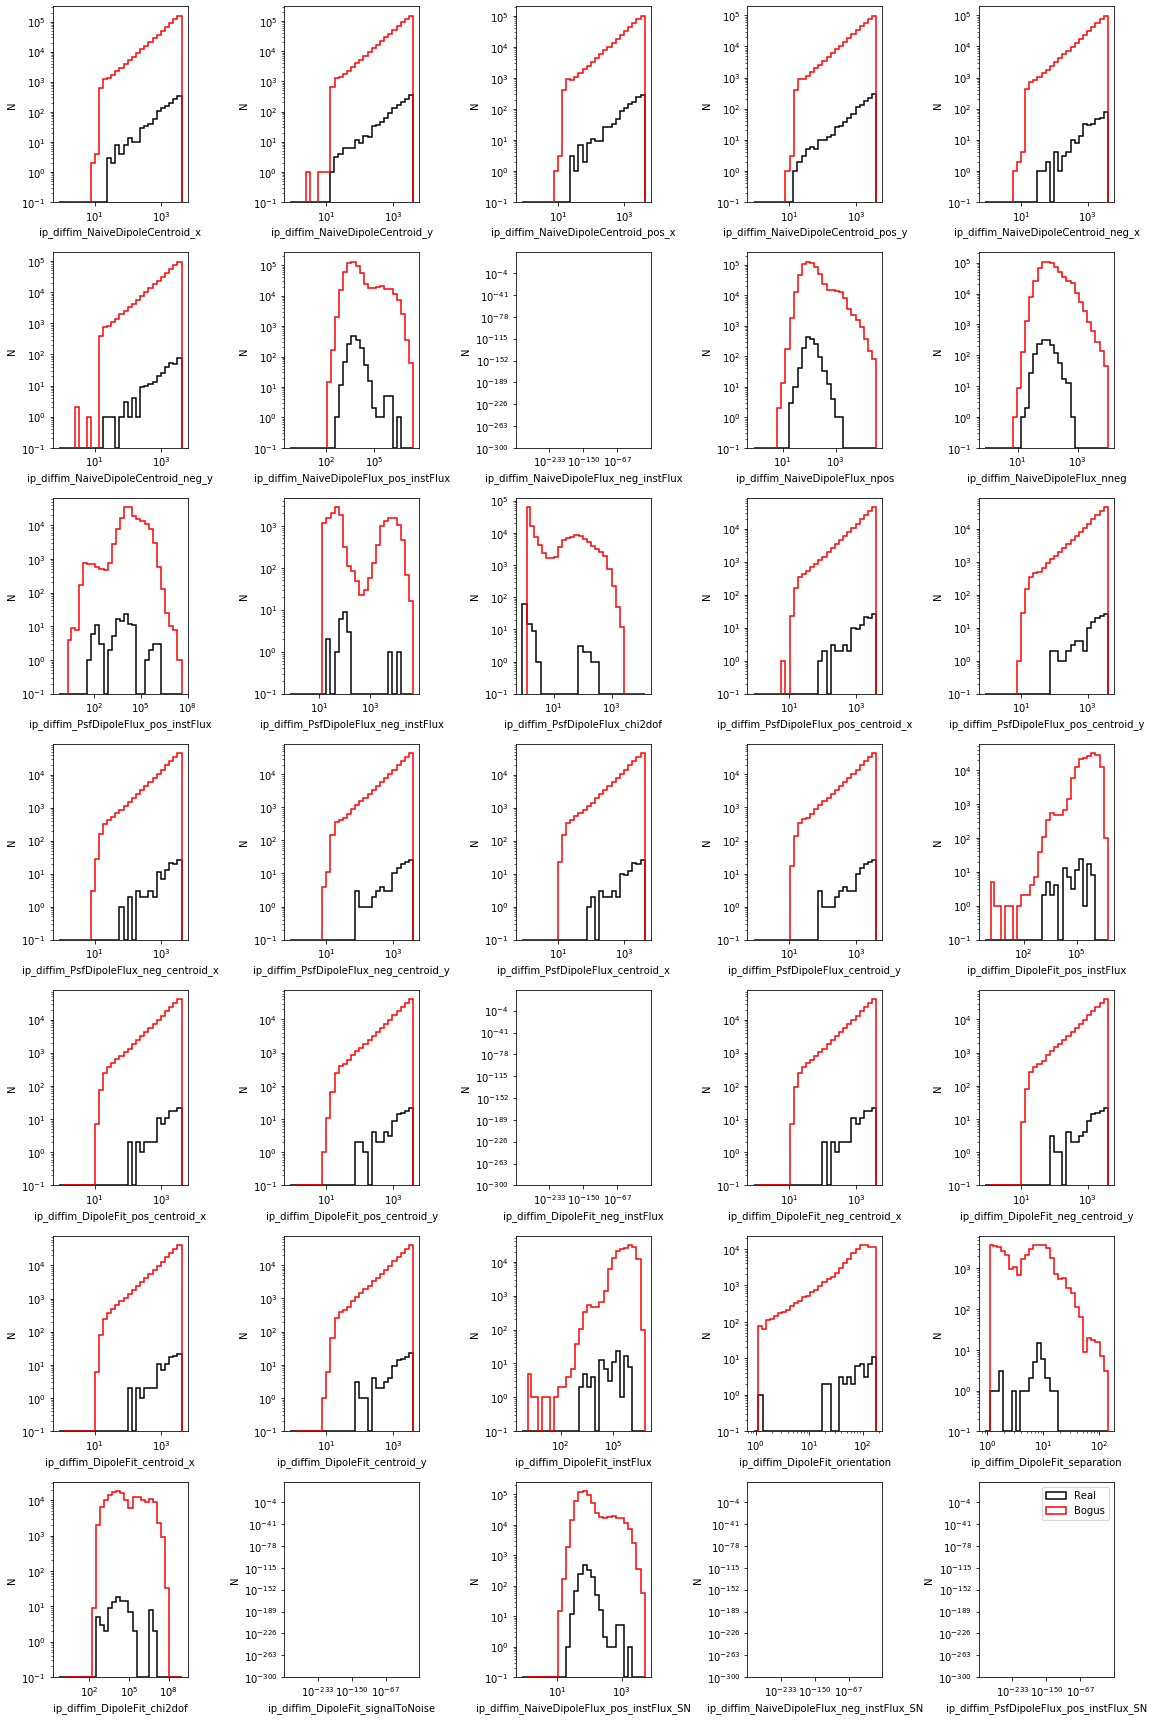

In [20]:
fig, axis = plt.subplots(ncols=5, nrows=7, figsize=(16, 24))
for acol, ax in zip(cols, axis.flatten()):
    bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=30)
    binary_plot_hist(reals, bogus, acol, ax, log=True, bins=bins,
                     logx=True, density=False, histtype='step', lw=1.5)
ax.legend(loc='best')
plt.tight_layout()

In [21]:
cols = [acol for acol in reals.columns if 'Classification' in acol]

In [22]:
len(cols)

2

/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/global/homes/b/bos0109/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


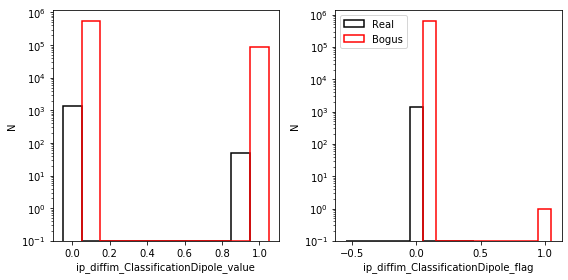

In [23]:
fig, axis = plt.subplots(ncols=2, nrows=1, figsize=(8,4))
for acol, ax in zip(cols, axis.flatten()):
    #bins=np.logspace(0, np.log10(np.max([np.max(reals[acol]), np.max(bogus[acol])])), num=30)
    binary_plot_hist(reals, bogus, acol, ax, log=True, #bins=bins,
                     logx=False, density=False, histtype='step', lw=1.5)
ax.legend(loc='best')
plt.tight_layout()

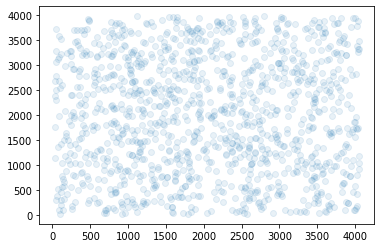

In [24]:
plt.scatter(reals.ip_diffim_NaiveDipoleCentroid_pos_x, reals.ip_diffim_NaiveDipoleCentroid_pos_y, alpha=0.1)

In [25]:
[acol for acol in reals.columns if 'pos_x' in acol or 'pos_y' in acol]

['ip_diffim_NaiveDipoleCentroid_pos_x',
 'slot_Centroid_pos_x',
 'ip_diffim_NaiveDipoleCentroid_pos_y',
 'slot_Centroid_pos_y',
 'ip_diffim_NaiveDipoleCentroid_pos_xErr',
 'slot_Centroid_pos_xErr',
 'ip_diffim_NaiveDipoleCentroid_pos_yErr',
 'slot_Centroid_pos_yErr']

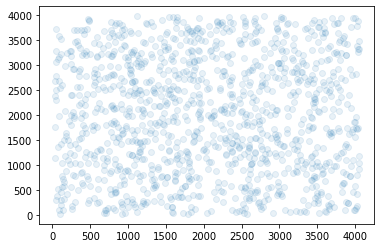

In [26]:
plt.scatter(reals.slot_Centroid_pos_x, reals.slot_Centroid_pos_y, alpha=0.1)

In [27]:
[acol for acol in reals.columns if 'coord' in acol]

['coord_ra', 'coord_dec']

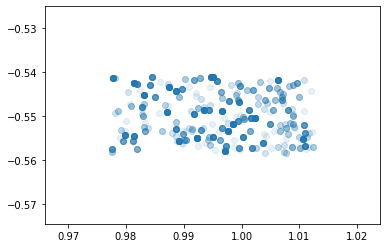

In [28]:
plt.scatter(reals.coord_ra, reals.coord_dec, alpha=0.1)

---------
### Single Flux measurement

In [29]:
instFluxCols = [acol for acol in reals.columns if 'instFlux' in acol and 'Cov' not in acol and 'Err' not in acol]

In [30]:
instFluxCols

['base_SdssShape_instFlux',
 'slot_Shape_instFlux',
 'base_CircularApertureFlux_3_0_instFlux',
 'base_CircularApertureFlux_4_5_instFlux',
 'base_CircularApertureFlux_6_0_instFlux',
 'base_CircularApertureFlux_9_0_instFlux',
 'base_CircularApertureFlux_12_0_instFlux',
 'slot_ApFlux_instFlux',
 'base_CircularApertureFlux_17_0_instFlux',
 'base_CircularApertureFlux_25_0_instFlux',
 'base_CircularApertureFlux_35_0_instFlux',
 'base_CircularApertureFlux_50_0_instFlux',
 'base_CircularApertureFlux_70_0_instFlux',
 'base_GaussianFlux_instFlux',
 'base_PeakLikelihoodFlux_instFlux',
 'base_PsfFlux_instFlux',
 'slot_PsfFlux_instFlux',
 'ip_diffim_NaiveDipoleFlux_pos_instFlux',
 'ip_diffim_NaiveDipoleFlux_neg_instFlux',
 'ip_diffim_PsfDipoleFlux_pos_instFlux',
 'ip_diffim_PsfDipoleFlux_neg_instFlux',
 'ip_diffim_DipoleFit_pos_instFlux',
 'ip_diffim_DipoleFit_neg_instFlux',
 'ip_diffim_DipoleFit_instFlux',
 'ip_diffim_forced_PsfFlux_instFlux',
 'base_SdssShape_instFlux_SN',
 'slot_Shape_instFlux_S